# Giriş
Merhaba, TechCareer tarafından düzenlenen Machine Learning Bootcamp eğitiminin son aşaması olan bu projemi sizlere tanıtmak istiyorum. İlk önce eğitimden bahsedelim, Machine Learning Bootcamp sürecinde, makine öğrenimi modelleri ve derin öğrenme modelleri üzerinde eğitim geçekleştirdik. Bu eğitim 1 ay'lık bir zaman diliminde gerçekleşmiştir. Şimdi projemden bahsetmem gerekir ise, ben bu projemde ürün yorumlarından oluşan veri setinden yorumları sınıflandırma işlemi gerçekleştirdim. Projem boyunca uyguladığım Makine öğrenimi modelleri:<br>
- Naive Bayes Classification
    - Gaussian Naive Bayes
    - Multinomial Naive Bayes
    - Bernoulli Naive Bayes
- Support Vector Machine Classification
- Logistic Regression
- K-Nearest Neighbors(KNN)
- Decision Tree Classification
- Random Forest Classification

Uyguladığım makine öğrenimi modellerini eğitim sonuçlarını karşılaştırdım. Aynı zamanda derin öğrenme modelleri olan RNN(Reccurrent Neural Network) ve LSTM(Long short-term memory) modellerini uyguladım. Umarım projem sizin için yararlı olmuştur.

Sizlerde TechCareer bootcamplerinden haberdar olmak ve katılmak isterseniz lütfen [buraya tıklayın](https://www.techcareer.net/bootcamp)
    

# İçindekiler <a id = "cont"></a>
- [Veri Seti İncelemesi](#1)
- [Veri Setini Hazırlama Aşaması](#2)
- [2. Hazırlık Aşaması](#3)
- [Makine Öğrenim Modelleri](#möm)
    - [Naive Bayes Classification](#4)
    - [Support Vector Machine Classification](#5)
    - [Logistic Regression](#6)
    - [K-Nearest Neighbors(KNN)](#7)
    - [Decision Tree Classification](#8)
    - [Random Forest Classification](#9)
- [Derin Öğrenme Modelleri](#döm)
    - [RNN(Reccurrent Neural Network)](#10)
    - [LSTM(Long short-term memory)](#11)
- [Sonuç](#son)

In [1]:
# Kullandığım Kütüphanelerim
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları görmezden gelme!
import warnings
warnings.filterwarnings("ignore")

# Veri Seti İncelemesi <a id = "1"></a>
[Go Content](#cont)

In [2]:
data = pd.read_csv("/kaggle/input/duygu-analizi-icin-urun-yorumlari/magaza_yorumlari_duygu_analizi.csv", encoding = "utf-16")

In [3]:
data.head(10)

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz
5,Giriş seviyesindeki kullanıcılar için kabul ed...,Tarafsız
6,kullanisli baya,Olumlu
7,Dezavantajlar : Pahalı ürün<br />Merhabalar bu...,Tarafsız
8,ÜRÜN GÜZEL BU PARALARA BAŞKA BULAMAZSINIZ,Tarafsız
9,Tasarım ve kalite iyi olmasına rağmen yazma hı...,Tarafsız


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429 entries, 0 to 11428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   11426 non-null  object
 1   Durum   11429 non-null  object
dtypes: object(2)
memory usage: 178.7+ KB


In [5]:
data = data.dropna()

In [6]:
data

,Görüş,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz
...,...,...
11424,biraz fazla ısınıyor ama sorumsuz çalışıyor,Tarafsız
11425,orijinal ürün fakat ambalaj bize ulaşana kadar...,Tarafsız
11426,bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...,Olumsuz
11427,Bir sene olmadı ayar düğmesine basıyorum ekran...,Tarafsız


In [7]:
data = data.rename({'Görüş': 'Gorus'}, axis=1)

In [8]:
data.head()

,Gorus,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",Olumsuz
1,hizli teslimat tesekkürler,Tarafsız
2,ses olayı süper....gece çalıştır sıkıntı yok.....,Olumlu
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,Olumsuz
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,Olumsuz


In [9]:
data.columns

Index(['Gorus', 'Durum'], dtype='object')

In [10]:
data["Durum"].value_counts()

Olumlu      4252
Olumsuz     4237
Tarafsız    2937
Name: Durum, dtype: int64

Olumlu      4252
Olumsuz     4237
Tarafsız    2937
Name: Durum, dtype: int64


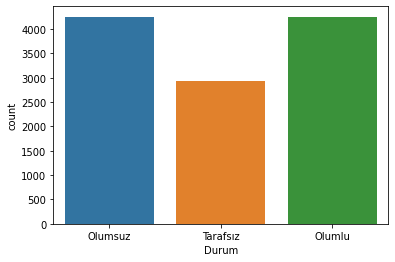

In [11]:
sns.countplot(data["Durum"])
print(data.Durum.value_counts())

In [12]:
data['Durum'] = data.loc[:, 'Durum'].map({'Olumlu' : 0, 'Olumsuz' : 1 , 'Tarafsız' : 2})

In [13]:
data

,Gorus,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",1
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,0
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,1
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,1
...,...,...
11424,biraz fazla ısınıyor ama sorumsuz çalışıyor,2
11425,orijinal ürün fakat ambalaj bize ulaşana kadar...,2
11426,bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...,1
11427,Bir sene olmadı ayar düğmesine basıyorum ekran...,2


In [14]:
data["Gorus"]

0        ses kalitesi ve ergonomisi rezalet, sony olduğ...
1                               hizli teslimat tesekkürler
2        ses olayı süper....gece çalıştır sıkıntı yok.....
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        Kulaklığın sesi kaliteli falan değil. Aleti öv...
                               ...                        
11424          biraz fazla ısınıyor ama sorumsuz çalışıyor
11425    orijinal ürün fakat ambalaj bize ulaşana kadar...
11426    bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...
11427    Bir sene olmadı ayar düğmesine basıyorum ekran...
11428    Urun kaliteli zamaninda tedlimat ve kullanisli...
Name: Gorus, Length: 11426, dtype: object

In [15]:
print(data["Gorus"][0] + "\n")
print(data["Gorus"][4000] + "\n")
print(data["Gorus"][4588] + "\n")

ses kalitesi ve ergonomisi rezalet, sony olduğu için aldım ama 4'de 1 fiyatına çin replika ürün alsaydım çok çok daha iyiydi, kesinlikle tavsiye etmiyorum.

Süpürge arayışınızı bitirmek ve bu konuyu kapatmak için tercihiniz olmalı. Anlatılmaz yaşanır bir temizlik gücü var. Parça ve aksamlar için şimdiden bir şey söylemek zor...Ancak anneme aldık, temizliğini görünce kendi süpürgemden soğudum :) Bundan sonraki süpürge tercihim olacak..

bir ay olmadan bozuldu



# Veri Setini Hazırlama Aşaması <a id = "2"></a>
[Go Content](#cont)

In [16]:
data

,Gorus,Durum
0,"ses kalitesi ve ergonomisi rezalet, sony olduğ...",1
1,hizli teslimat tesekkürler,2
2,ses olayı süper....gece çalıştır sıkıntı yok.....,0
3,geldi bigün kullandık hemen bozoldu hiçtavsiye...,1
4,Kulaklığın sesi kaliteli falan değil. Aleti öv...,1
...,...,...
11424,biraz fazla ısınıyor ama sorumsuz çalışıyor,2
11425,orijinal ürün fakat ambalaj bize ulaşana kadar...,2
11426,bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...,1
11427,Bir sene olmadı ayar düğmesine basıyorum ekran...,2


In [17]:
data["Gorus"][125]

'ürün az önce elime geçti buradan aldım kargoyu zamanında yolladıkları için teşekkür ediyorum ama ürün hayal kırıklığı çok pişman oldum malzeme kalitesi bana göre iyi değil çekiş gücü süpürdüğünü bile farketmiyorum diyeceğim kadar komşumun 1200w süpürgesi bundan güzel çektiğini söyleyebilirim yorumlara bakarak ürünümün arızalı oldugunu bile düşünüyorum ama yinede tavsiye etmiyorum'

In [18]:
import re
cumle0 = data["Gorus"][125]
cumle1 = re.sub("[^a-zA-Z]", " ", cumle0)
cumle2 = cumle1.lower()

In [19]:
cumle2

' r n az  nce elime ge ti buradan ald m kargoyu zaman nda yollad klar  i in te ekk r ediyorum ama  r n hayal k r kl     ok pi man oldum malzeme kalitesi bana g re iyi de il  eki  g c  s p rd   n  bile farketmiyorum diyece im kadar kom umun     w s p rgesi bundan g zel  ekti ini s yleyebilirim yorumlara bakarak  r n m n ar zal  oldugunu bile d   n yorum ama yinede tavsiye etmiyorum'

In [20]:
listcumle0 = list(cumle0)
for i in range(0,len(listcumle0)):
    if listcumle0[i] == "ü":
        listcumle0[i] = "u"
    elif listcumle0[i] == "Ü":
        listcumle0[i] = "U"
    elif listcumle0[i] == "ö":
        listcumle0[i] = "o"
    elif listcumle0[i] == "Ö":
        listcumle0[i] = "O"
    elif listcumle0[i] == "İ":
        listcumle0[i] = "I"
    elif listcumle0[i] == "ç":
        listcumle0[i] = "c"
    elif listcumle0[i] == "Ç":
        listcumle0[i] = "C"
    elif listcumle0[i] == "ğ":
        listcumle0[i] = "g"
    elif listcumle0[i] == "Ğ":
        listcumle0[i] = "G"
    elif listcumle0[i] == "ş":
        listcumle0[i] = "s"
    elif listcumle0[i] == "Ş":
        listcumle0[i] = "S"
    elif listcumle0[i] == "ı":
        listcumle0[i] = "i"
str1 = ''.join(listcumle0)
str1

'urun az once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum ama urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun 1200w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum ama yinede tavsiye etmiyorum'

In [21]:
cumle1 = re.sub("[^a-zA-Z]", " ", str1)
cumle2 = cumle1.lower()
cumle2

'urun az once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum ama urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun     w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum ama yinede tavsiye etmiyorum'

In [22]:
import nltk
from nltk.corpus import stopwords

cumle2 = nltk.word_tokenize(cumle2)
cumle2 = [word for word in cumle2 if not word in set(stopwords.words("turkish"))]

In [23]:
cumle2

['urun',
 'once',
 'elime',
 'gecti',
 'buradan',
 'aldim',
 'kargoyu',
 'zamaninda',
 'yolladiklari',
 'icin',
 'tesekkur',
 'ediyorum',
 'urun',
 'hayal',
 'kirikligi',
 'cok',
 'pisman',
 'oldum',
 'malzeme',
 'kalitesi',
 'bana',
 'gore',
 'iyi',
 'degil',
 'cekis',
 'gucu',
 'supurdugunu',
 'bile',
 'farketmiyorum',
 'diyecegim',
 'kadar',
 'komsumun',
 'w',
 'supurgesi',
 'bundan',
 'guzel',
 'cektigini',
 'soyleyebilirim',
 'yorumlara',
 'bakarak',
 'urunumun',
 'arizali',
 'oldugunu',
 'bile',
 'dusunuyorum',
 'yinede',
 'tavsiye',
 'etmiyorum']

In [24]:
cumle3 = " ".join(cumle2)
cumle3

'urun once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum yinede tavsiye etmiyorum'

# 2. Hazırlık Aşaması <a id = "3"></a>
[Go Content](#cont)

In [25]:
def harfdegistir(cumle):
    listcumle0 = list(cumle)
    for i in range(0,len(listcumle0)):
        if listcumle0[i] == "ü":
            listcumle0[i] = "u"
        elif listcumle0[i] == "Ü":
            listcumle0[i] = "U"
        elif listcumle0[i] == "ö":
            listcumle0[i] = "o"
        elif listcumle0[i] == "Ö":
            listcumle0[i] = "O"
        elif listcumle0[i] == "İ":
            listcumle0[i] = "I"
        elif listcumle0[i] == "ç":
            listcumle0[i] = "c"
        elif listcumle0[i] == "Ç":
            listcumle0[i] = "C"
        elif listcumle0[i] == "ğ":
            listcumle0[i] = "g"
        elif listcumle0[i] == "Ğ":
            listcumle0[i] = "G"
        elif listcumle0[i] == "ş":
            listcumle0[i] = "s"
        elif listcumle0[i] == "Ş":
            listcumle0[i] = "S"
        elif listcumle0[i] == "ı":
            listcumle0[i] = "i"
        
    cumle0 = ''.join(listcumle0)
    
    cumle1 = re.sub("[^a-zA-Z]", " ", cumle0)
    cumle2 = cumle1.lower()
    
    cumle2 = nltk.word_tokenize(cumle2)
    cumle2 = [word for word in cumle2 if not word in set(stopwords.words("turkish"))]
    
    cumle3 = " ".join(cumle2)
    
    return cumle3

In [26]:
data["Gorus"]

0        ses kalitesi ve ergonomisi rezalet, sony olduğ...
1                               hizli teslimat tesekkürler
2        ses olayı süper....gece çalıştır sıkıntı yok.....
3        geldi bigün kullandık hemen bozoldu hiçtavsiye...
4        Kulaklığın sesi kaliteli falan değil. Aleti öv...
                               ...                        
11424          biraz fazla ısınıyor ama sorumsuz çalışıyor
11425    orijinal ürün fakat ambalaj bize ulaşana kadar...
11426    bu cihazı 1 yıldır kullanıyorum cihazı çok beğ...
11427    Bir sene olmadı ayar düğmesine basıyorum ekran...
11428    Urun kaliteli zamaninda tedlimat ve kullanisli...
Name: Gorus, Length: 11426, dtype: object

In [27]:
print("Veri setinin uzunluğu: ",len(data["Gorus"]))

Veri setinin uzunluğu:  11426


In [28]:
X = data["Gorus"].values
print("Veri Setinin Uzunluğu: ",len(X))

Veri Setinin Uzunluğu:  11426


In [29]:
X[125]

'ürün az önce elime geçti buradan aldım kargoyu zamanında yolladıkları için teşekkür ediyorum ama ürün hayal kırıklığı çok pişman oldum malzeme kalitesi bana göre iyi değil çekiş gücü süpürdüğünü bile farketmiyorum diyeceğim kadar komşumun 1200w süpürgesi bundan güzel çektiğini söyleyebilirim yorumlara bakarak ürünümün arızalı oldugunu bile düşünüyorum ama yinede tavsiye etmiyorum'

In [30]:
SonGorus = []

for i in range(len(X)):
    X_ = harfdegistir(X[i])
    SonGorus.append(X_)

In [31]:
SonGorus[125]

'urun once elime gecti buradan aldim kargoyu zamaninda yolladiklari icin tesekkur ediyorum urun hayal kirikligi cok pisman oldum malzeme kalitesi bana gore iyi degil cekis gucu supurdugunu bile farketmiyorum diyecegim kadar komsumun w supurgesi bundan guzel cektigini soyleyebilirim yorumlara bakarak urunumun arizali oldugunu bile dusunuyorum yinede tavsiye etmiyorum'

In [32]:
print(SonGorus[0] + "\n")
print(SonGorus[4588] + "\n")
print(SonGorus[4000] + "\n")

ses kalitesi ergonomisi rezalet sony oldugu icin aldim fiyatina cin replika urun alsaydim cok cok iyiydi kesinlikle tavsiye etmiyorum

guzel kullanisli utu

fiyatina gore cok cok uygun harika



In [33]:
from sklearn.feature_extraction.text import CountVectorizer
max_feature = 2000

cv = CountVectorizer(max_features = max_feature, stop_words = stopwords.words("turkish"))

space_matrix = cv.fit_transform(SonGorus).toarray() # x

print("En sık kullanılan {} kelimeler {}".format(max_feature, cv.get_feature_names_out()))

En sık kullanılan 2000 kelimeler ['ac' 'acayip' 'acidan' ... 'zeminde' 'zor' 'zorunda']


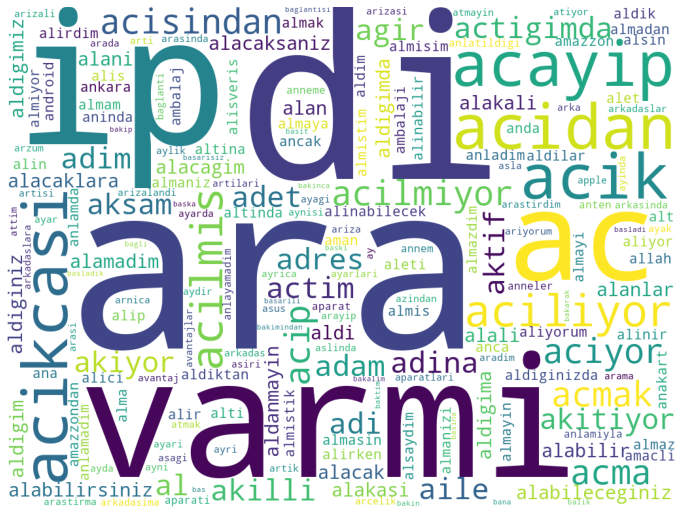

In [34]:
from wordcloud import WordCloud

encokkullanilanlar = cv.get_feature_names_out()

plt.subplots(figsize=(12,12))
wordcloud=WordCloud(background_color="white",width=1024,height=768).generate(" ".join(list(encokkullanilanlar)))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
X = space_matrix
y = data.iloc[:,1].values

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

# Makine Öğrenim Modelleri <a id="möm"></a>
[Go Content](#cont)

In [37]:
# Makine Öğrenimi Alanında Kullancağım Kütüphanelerim

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Naive Bayes Classification <a id = "4"></a>
[Go Content](#cont)

In [38]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

gnb_csv = cross_val_score(estimator = gnb, X= x_train, y = y_train, cv = 5)


print("GaussianNB Accuracy: ", accuracy_score(y_pred,y_test))

print("GaussianNB Test Score: ", gnb.score(x_test, y_test))
print("GaussianNB Train Score: ", gnb.score(x_train, y_train))

print("GaussianNB Cross Validation Mean: ", gnb_csv.mean())
print("GaussianNB Cross Validation Std: ", gnb_csv.std())

GaussianNB Accuracy:  0.5456772838641932
GaussianNB Test Score:  0.5456772838641932
GaussianNB Train Score:  0.6286614540786556
GaussianNB Cross Validation Mean:  0.5406695044620689
GaussianNB Cross Validation Std:  0.003189285110471602


In [39]:
bnb= BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)

bnb_cvs = cross_val_score(estimator=bnb, X = x_train, y = y_train, cv = 5)

print("BernoulliNB Accuracy: ", accuracy_score(y_pred_bnb,y_test))

print("BernoulliNB Test Score: ", bnb.score(x_test, y_test))
print("BernoulliNB Train Score: ", bnb.score(x_train, y_train))

print("BernoulliNB Cross Validation Mean: ", bnb_cvs.mean())
print("BernoulliNB Cross Validation Std: ", bnb_cvs.std())

BernoulliNB Accuracy:  0.6625831291564578
BernoulliNB Test Score:  0.6625831291564578
BernoulliNB Train Score:  0.7142023573345782
BernoulliNB Cross Validation Mean:  0.6653052605479003
BernoulliNB Cross Validation Std:  0.006539737096117522


In [40]:
mnb = MultinomialNB()

mnb.fit(x_train,y_train)

y_pred_mnb = mnb.predict(x_test)

mnb_cvs = cross_val_score(estimator=mnb, X = x_train, y = y_train, cv = 5)

print("MultinomialNB Accuracy: ", accuracy_score(y_pred_mnb, y_test))

print("MultinomialNB Test Score: ", mnb.score(x_test, y_test))
print("MultinomialNB Train Score: ", mnb.score(x_train, y_train))

print("MultinomialNB Cross Validation Mean: ", mnb_cvs.mean())
print("MultinomialNB Cross Validation Std: ", mnb_cvs.std())

MultinomialNB Accuracy:  0.6972348617430871
MultinomialNB Test Score:  0.6972348617430871
MultinomialNB Train Score:  0.7620492472867313
MultinomialNB Cross Validation Mean:  0.7109342314008942
MultinomialNB Cross Validation Std:  0.005433942546477297


## Support Vector Machine Classification <a id = "5"></a>
[Go Content](#cont)

In [41]:
svc = SVC(random_state = 1, kernel = "rbf")
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)

svc_cvs = cross_val_score(estimator= svc, X = x_train, y = y_train, cv = 5)

print("Rbf ile SVC Accuracy: ", accuracy_score(y_pred_svc, y_test))

print("Rbf ile SVC Test accuracy: {}".format(svc.score(x_test,y_test)))
print("Rbf ile SVC Train accuracy: {}".format(svc.score(x_train, y_train)))

print("Rbf ile SVC Cross Validation Mean: ", svc_cvs.mean())
print("Rbf ile SVC Cross Validation Std: ", svc_cvs.std())

Rbf ile SVC Accuracy:  0.6853342667133356
Rbf ile SVC Test accuracy: 0.6853342667133356
Rbf ile SVC Train accuracy: 0.8695297000816898
Rbf ile SVC Cross Validation Mean:  0.6870105807671585
Rbf ile SVC Cross Validation Std:  0.004207592051120965


In [42]:
svc2 = SVC(random_state = 1, kernel = "linear")
svc2.fit(x_train, y_train)

y_pred_svc2 = svc.predict(x_test)

svc_cvs2 = cross_val_score(estimator= svc2, X = x_train, y = y_train, cv = 5)

print("linear ile SVC Accuracy: ", accuracy_score(y_pred_svc2, y_test))

print("linear ile SVC Test accuracy {}".format(svc2.score(x_test,y_test)))
print("linear ile SVC Train accuracy {}".format(svc2.score(x_train, y_train)))

print("linear ile SVC Cross Validation Mean: ", svc_cvs.mean())
print("linear ile SVC Cross Validation Std: ", svc_cvs.std())

linear ile SVC Accuracy:  0.6853342667133356
linear ile SVC Test accuracy 0.6762338116905845
linear ile SVC Train accuracy 0.8759481853191737
linear ile SVC Cross Validation Mean:  0.6870105807671585
linear ile SVC Cross Validation Std:  0.004207592051120965


In [43]:
svc3 = SVC(random_state = 1, kernel = "poly")
svc3.fit(x_train, y_train)

y_pred_svc3 = svc.predict(x_test)

svc_cvs3 = cross_val_score(estimator= svc3, X = x_train, y = y_train, cv = 5)

print("Poly ile SVC Accuracy: ", accuracy_score(y_pred_svc3, y_test))

print("Poly ile SVC Test accuracy {}".format(svc3.score(x_test,y_test)))
print("Poly ile SVC Train accuracy {}".format(svc3.score(x_train, y_train)))

print("Poly ile SVC Cross Validation Mean: ", svc_cvs3.mean())
print("Poly ile SVC Cross Validation Std: ", svc_cvs3.std())

Poly ile SVC Accuracy:  0.6853342667133356
Poly ile SVC Test accuracy 0.5848792439621981
Poly ile SVC Train accuracy 0.7839887968257673
Poly ile SVC Cross Validation Mean:  0.5522199993051965
Poly ile SVC Cross Validation Std:  0.024281738731952416


In [44]:
svc4 = SVC(random_state = 1, kernel = "sigmoid")
svc4.fit(x_train, y_train)

y_pred_svc4 = svc.predict(x_test)

svc_cvs4 = cross_val_score(estimator= svc4, X = x_train, y = y_train, cv = 5)

print("Sigmoid ile SVC Accuracy: ", accuracy_score(y_pred_svc4, y_test))

print("Sigmoid ile SVC Test accuracy {}".format(svc4.score(x_test,y_test)))
print("Sigmoid ile SVC Train accuracy {}".format(svc4.score(x_train, y_train)))

print("Sigmoid ile SVC Cross Validation Mean: ", svc_cvs4.mean())
print("Sigmoid ile SVC Cross Validation Std: ", svc_cvs4.std())

Sigmoid ile SVC Accuracy:  0.6853342667133356
Sigmoid ile SVC Test accuracy 0.5950297514875744
Sigmoid ile SVC Train accuracy 0.6487338079122418
Sigmoid ile SVC Cross Validation Mean:  0.6292455047236419
Sigmoid ile SVC Cross Validation Std:  0.010780552896806215


## Logistic Regression <a id = "6"></a>
[Go Content](#cont)

In [45]:
logr = LogisticRegression(random_state = 0)
logr.fit(x_train, y_train)

y_pred_logr = logr.predict(x_test)

bas_log = cross_val_score(estimator = logr, X = x_test, y = y_test, cv = 4)

print("Logistic Regression Accuracy: ", accuracy_score(y_pred_logr, y_test))

print("Logistic Regression Test accuracy {}".format(logr.score(x_test,y_test)))
print("Logistic Regression Train accuracy {}".format(logr.score(x_train, y_train)))

print("Logistic ile SVC Cross Validation Mean: ", bas_log.mean())
print("Logistic ile SVC Cross Validation Std: ", bas_log.std())

Logistic Regression Accuracy:  0.6818340917045852
Logistic Regression Test accuracy 0.6818340917045852
Logistic Regression Train accuracy 0.8590267242385342
Logistic ile SVC Cross Validation Mean:  0.6594405594405595
Logistic ile SVC Cross Validation Std:  0.016943854683223097


## K-Nearest Neighbors(KNN) <a id = "7"></a>
[Go Content](#cont)

- n_neighbors:(int, default=5) Kneighbors sorguları için varsayılan olarak kullanılacak komşu sayısı.

- weights : {‘uniform’, ‘distance’} or callable, default=’uniform’<br>
    Tahminde kullanılan ağırlık fonksiyonu. Olası değerler:
    - ‘uniform’ : tek tip ağırlıklar. Her mahalledeki tüm noktalar eşit ağırlıktadır.
    - ‘distance’: uzaklıklarının tersi ile ağırlık noktaları. bu durumda, bir sorgu noktasının daha yakın komşuları, uzaktaki komşulardan daha büyük bir etkiye sahip olacaktır.

- p:(int, default=2) Minkowski metriği için güç parametresi. p = 1 olduğunda, bu manhattan_mesafe (l1) ve p = 2 için euclidean_mesafe (l2) kullanımına eşdeğerdir. Rastgele p için minkowski_mesafesi (l_p) kullanılır.

In [46]:
knn_grid = KNeighborsClassifier(metric = "minkowski")

p_knn = {"n_neighbors" : range(1,10), "weights" : ["uniform", "distance"], "p" : [1,2]}

grid_knn = GridSearchCV(estimator = knn_grid, param_grid = p_knn, scoring = "accuracy", cv = 4)
grid_knn_search = grid_knn.fit(x_train, y_train)
y_pred_grid_knn = grid_knn.predict(x_test)

best_parm_grid_knn = grid_knn_search.best_params_
best_score_grid_knn = grid_knn_search.best_score_

print("GridSearch ile knn modelinin en iyi parametırları: ", best_parm_grid_knn)
print("GridSearch ile knn modelinin en iyi skoru: ",best_score_grid_knn)

GridSearch ile knn modelinin en iyi parametırları:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
GridSearch ile knn modelinin en iyi skoru:  0.5612109519496086


## Decision Tree Classification <a id = "8"></a>
[Go Content](#cont)

- criterion : ({“gini”, “entropy”, “log_loss”}, default=”gini”) Bir bölünmenin kalitesini ölçme işlevi. Desteklenen kriterler, Gini safsızlığı için "gini" ve Shannon bilgi kazancı için "log_loss" ve "entropi"dir.

- splitter : ({“best”, “random”}, default=”best”) Her düğümde bölünmeyi seçmek için kullanılan strateji. Desteklenen stratejiler, en iyi bölmeyi seçmek için "en iyi" ve en iyi rastgele bölmeyi seçmek için "rastgele"dir.

In [47]:
dtr = DecisionTreeClassifier()

p_dtc = {"criterion" : ["gini", "entropy"], "splitter" : ["best", "random"], }

grid_dtc = GridSearchCV(estimator = dtr, param_grid = p_dtc, scoring = "accuracy", cv = 4)
grid_dtc_search = grid_dtc.fit(x_train, y_train)
y_pred_grid_dtc = grid_dtc.predict(x_test)

best_parm_grid_dtc = grid_dtc_search.best_params_
best_score_grid_dtc = grid_dtc_search.best_score_

print("GridSearch ile dtc modelinin en iyi parametırları: ", best_parm_grid_dtc)
print("GridSearch ile dtc modelinin en iyi skoru: ",best_score_grid_dtc)

GridSearch ile dtc modelinin en iyi parametırları:  {'criterion': 'entropy', 'splitter': 'random'}
GridSearch ile dtc modelinin en iyi skoru:  0.5829163676669922


## Random Forest Classification <a id = "9"></a>
[Go Content](#cont)

- n_estimators: (int, default=100) Ormandaki ağaç sayısı.

- criterion: ({“gini”, “entropy”, “log_loss”}, default=”gini”) Bir bölünmenin kalitesini ölçme işlevi. Desteklenen kriterler, Gini safsızlığı için "gini" ve Shannon bilgi kazancı için "log_loss" ve "entropi"dir.

- class_weight: ({“balanced”, “balanced_subsample”}, dict or list of dicts, default=None)

    {class_label:weight} biçimindeki sınıflarla ilişkili ağırlıklar. Verilmezse, tüm sınıfların bir ağırlığı olması gerekir. Çok çıkışlı problemler için, y sütunlarıyla aynı sırada bir dicts listesi sağlanabilir.
    
    Çoklu çıktı (çoklu etiket dahil) için, her sütunun her sınıfı için kendi diktinde ağırlıkların tanımlanması gerektiğini unutmayın. Örneğin, dört sınıflı çok etiketli sınıflandırma için ağırlıklar [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0:1, 1: olmalıdır. 1}] yerine [{1:1}, {2:5}, {3:1}, {4:1}].
    
    “balanced” mod, girdi verilerindeki sınıf frekanslarıyla ters orantılı ağırlıkları n_samples / (n_classes * np.bincount(y)) olarak otomatik olarak ayarlamak için y değerlerini kullanır.
    
    "balanced_subsample" modu, ağırlıkların büyütülen her ağaç için önyükleme örneğine göre hesaplanması dışında "dengeli" ile aynıdır.
    
    Çoklu çıktı için, her bir y sütununun ağırlıkları çarpılacaktır.
    
    Sample_weight belirtilirse, bu ağırlıkların sample_weight ile (uyma yönteminden geçirilen) çarpılacağını unutmayın.


In [48]:
rfc = RandomForestClassifier()

p_rfc = {"n_estimators" : range(1,10), "criterion" : ["gini", "entropy"], "class_weight" : ["balanced", "balanced_subsample"]}

grid_rfc = GridSearchCV(estimator = rfc, param_grid = p_rfc, scoring = "accuracy", cv = 4)
grid_rfc_search = grid_rfc.fit(x_train, y_train)
y_pred_grid_rfc = grid_rfc.predict(x_test)
    
best_parm_grid_rfc = grid_rfc_search.best_params_
best_score_grid_rfc = grid_rfc_search.best_score_

print("GridSearch ile rfc modelinin en iyi parametırları: ", best_parm_grid_rfc)
print("GridSearch ile rfc modelinin en iyi skoru: ",best_score_grid_rfc)

GridSearch ile rfc modelinin en iyi parametırları:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'n_estimators': 9}
GridSearch ile rfc modelinin en iyi skoru:  0.6425495925543961


# Derin Öğrenme Modelleri <a id = "döm"></a>
[Go Content](#cont)

## RNN(Reccurrent Neural Network) <a id = "10"></a>
[Go Content](#cont)

In [49]:
from keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers import SimpleRNN, Dense, Activation, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [50]:
maxlen = 300
X_train = pad_sequences(x_train, maxlen = maxlen)
X_test = pad_sequences(x_test, maxlen = maxlen)

In [51]:
rnn = Sequential()

rnn = Sequential()
rnn.add(Embedding(max_feature, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (max_feature,maxlen), return_sequences= False, activation= "tanh"))
rnn.add(Dense(1))

rnn.add(Activation("softmax"))
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

2022-11-12 02:49:27.228304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 02:49:27.324133: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 02:49:27.324968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 02:49:27.326249: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [52]:
print(rnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 32)           64000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 64,801
Trainable params: 64,801
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
History_rnn = rnn.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 32)

Epoch 1/10


2022-11-12 02:49:30.157156: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


268/268 [==============================] - 75s 274ms/step - loss: 0.3658 - accuracy: 0.3715 - val_loss: 0.3555 - val_accuracy: 0.3689
Epoch 2/10
268/268 [==============================] - 75s 280ms/step - loss: 0.3618 - accuracy: 0.3715 - val_loss: 0.3466 - val_accuracy: 0.3689
Epoch 3/10
268/268 [==============================] - 74s 276ms/step - loss: 0.3550 - accuracy: 0.3715 - val_loss: 0.3383 - val_accuracy: 0.3689
Epoch 4/10
268/268 [==============================] - 74s 276ms/step - loss: 0.3549 - accuracy: 0.3715 - val_loss: 0.3737 - val_accuracy: 0.3689
Epoch 5/10
268/268 [==============================] - 74s 275ms/step - loss: 0.3581 - accuracy: 0.3715 - val_loss: 0.3338 - val_accuracy: 0.3689
Epoch 6/10
268/268 [==============================] - 72s 270ms/step - loss: 0.3536 - accuracy: 0.3715 - val_loss: 0.3303 - val_accuracy: 0.3689
Epoch 7/10
268/268 [==============================] - 74s 277ms/step - loss: 0.3479 - accuracy: 0.3715 - val_loss: 0.3286 - val_accuracy: 0.3

In [54]:
score = rnn.evaluate(X_test, y_test)
print("Accuracy: %",score[1]*100)

90/90 [==============================] - 2s 20ms/step - loss: 0.3386 - accuracy: 0.3689
Accuracy: % 36.89184486865997


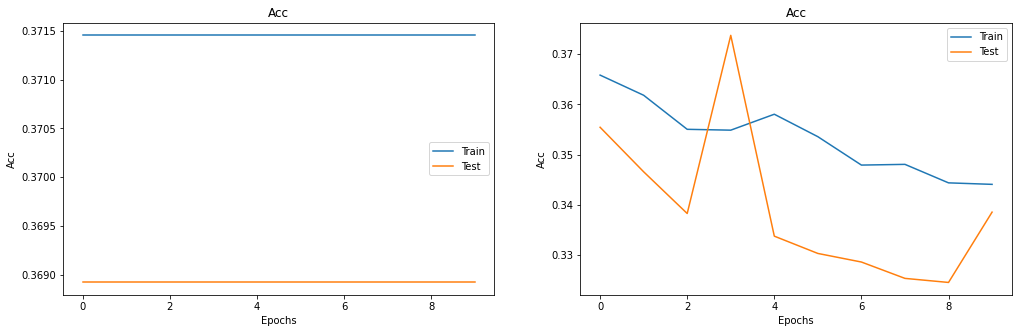

In [55]:
plt.figure(figsize = (17,5))
plt.subplot(1, 2, 1)
plt.plot(History_rnn.history["accuracy"], label = "Train")
plt.plot(History_rnn.history["val_accuracy"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(History_rnn.history["loss"], label = "Train")
plt.plot(History_rnn.history["val_loss"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# LSTM(Long short-term memory) <a id = "11"></a>
[Go Content](#cont)

In [56]:
model = Sequential()
model.add(Embedding(max_feature, 16, input_length = len(X_train[0])))
model.add(LSTM(8, input_shape = (max_feature,maxlen), activation = "tanh"))
model.add(Dense(1))
model.add(Activation("softmax"))
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])

In [57]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 16)           32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 32,809
Trainable params: 32,809
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
hist_lstm = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), batch_size = 10)

Epoch 1/10


2022-11-12 03:01:56.606106: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


857/857 [==============================] - 13s 12ms/step - loss: 0.6285 - accuracy: 0.3715 - val_loss: 0.6311 - val_accuracy: 0.3689
Epoch 2/10
857/857 [==============================] - 10s 11ms/step - loss: 0.6285 - accuracy: 0.3715 - val_loss: 0.6311 - val_accuracy: 0.3689
Epoch 3/10
857/857 [==============================] - 10s 12ms/step - loss: 0.6285 - accuracy: 0.3715 - val_loss: 0.6311 - val_accuracy: 0.3689
Epoch 4/10
857/857 [==============================] - 10s 11ms/step - loss: 0.6285 - accuracy: 0.3715 - val_loss: 0.6311 - val_accuracy: 0.3689
Epoch 5/10
857/857 [==============================] - 10s 11ms/step - loss: 0.6285 - accuracy: 0.3715 - val_loss: 0.6311 - val_accuracy: 0.3689
Epoch 6/10
857/857 [==============================] - 10s 12ms/step - loss: 0.6285 - accuracy: 0.3715 - val_loss: 0.6311 - val_accuracy: 0.3689
Epoch 7/10
857/857 [==============================] - 10s 11ms/step - loss: 0.6285 - accuracy: 0.3715 - val_loss: 0.6311 - val_accuracy: 0.3689
Epo

In [59]:
score = model.evaluate(X_test, y_test)
print("Accuracy: %",score[1]*100)

90/90 [==============================] - 1s 7ms/step - loss: 0.6311 - accuracy: 0.3689
Accuracy: % 36.89184486865997


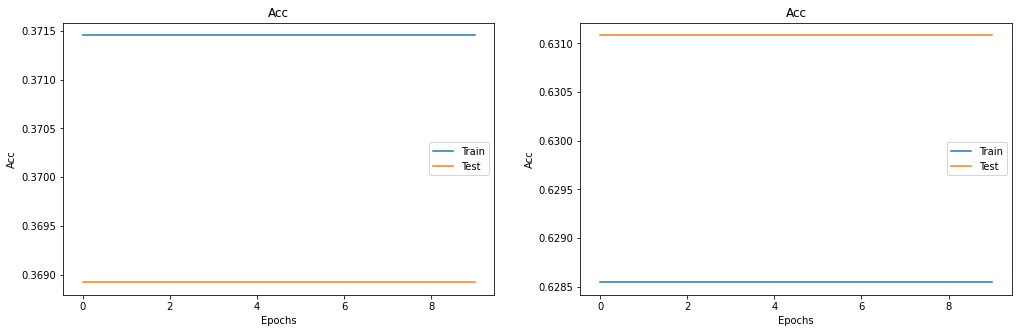

In [60]:
plt.figure(figsize = (17,5))
plt.subplot(1, 2, 1)
plt.plot(hist_lstm.history["accuracy"], label = "Train")
plt.plot(hist_lstm.history["val_accuracy"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_lstm.history["loss"], label = "Train")
plt.plot(hist_lstm.history["val_loss"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# Sonuç <a id = "son"></a>
[Go Content](#cont)